<a href="https://colab.research.google.com/github/VladislavHacker/test/blob/master/videman_franc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вопрос по выбору
# Закон Видемана-Франца
## МФТИ 2022, Троян-Головян Владислав, Б05-912, ФПМИ


---



### В работе используется: 
* Два вольтметра В7-78/1
* Два источника постоянного тока INSTEK GPR30H10D
* Вольтметр B7-38
* Ячейка номер 5 (образец медь).

### Цель работы:

* Экспериментально определить постоянную Лоренца для меди.
* Убедиться в справедливости закона Видемана-Франца


---



## Немного истории

В 1853 году немецкими учёными Г. Видеманом (1826—1899) и Р. Францем (1826—1902) на основании экспериментальных данных было установлено, что для различных металлов при одинаковой температуре отношение 
K/σ практически не изменяется. Пропорциональность этого отношения термодинамической температуре была установлена Л. Лоренцем в 1882 году. В его честь коэффициент L носит название числа Лоренца, а сам закон иногда именуют законом Видемана — Франца — Лоренца.



---



# Немного о кристалических структурах

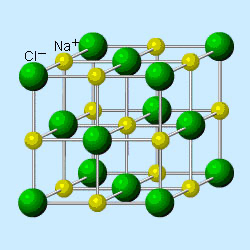

Рис 1. Кристаллическая структура NaCl.

**Кристалическая решетка** - ГМТ, получающееся применением трансляций к исходной точке.

**Кристалографический базис** - группа атомов, применение к которым операций трансляции дает можно полностью восстановить пространственное расположение атомов в теле.

**Кристалическая структура** = решетка + базис.

**Элементарная ячейка** - блок применяя к которому операции трансляции можно воссоздать кристаллическую структуру.

**Построение Вингера-Зейтца**. Соединяем с соеседями, строим серединные перпендикуляры, высекаем многогранник - он носит название, ячека Вингера-Зейтца.



---



# Теплоемкость решетки

**$$C=\frac{12 \pi^4 Nk_{б}}{5}(\frac{T}{Θ})^3$$**



---



# Закон Дюлонга-Пти

$$C=3Nk_{б}$$



---



# Свойства ферми-газа

# Закон Видемана-Франца

В металлах теплопроводность электронов сильно превышает теплопроводность кристаллической решетки, поэтому для вычисления теплопроводности можно использовать модель эдектронного ферми-газа. Если говорить простым языком, электроны из более горячей части, тоесть имеющие большую энергию, прилетают в более холодную и взаимодействуют с решеткой и другими электронами, отдавая им избыток энергии, эти процессы принято называть процессами релаксации. 

При совпадении $τ_{e}$ и $τ_{th}$ справедлив закон Видемана-Франца:

$$ L = \frac{κ}{σT} = \frac{\pi^2k_{б}^2}{3e^{2}} = 2.44 * 10^{-8} \frac{Вт * Ом}{К^2}$$



---



# Установка

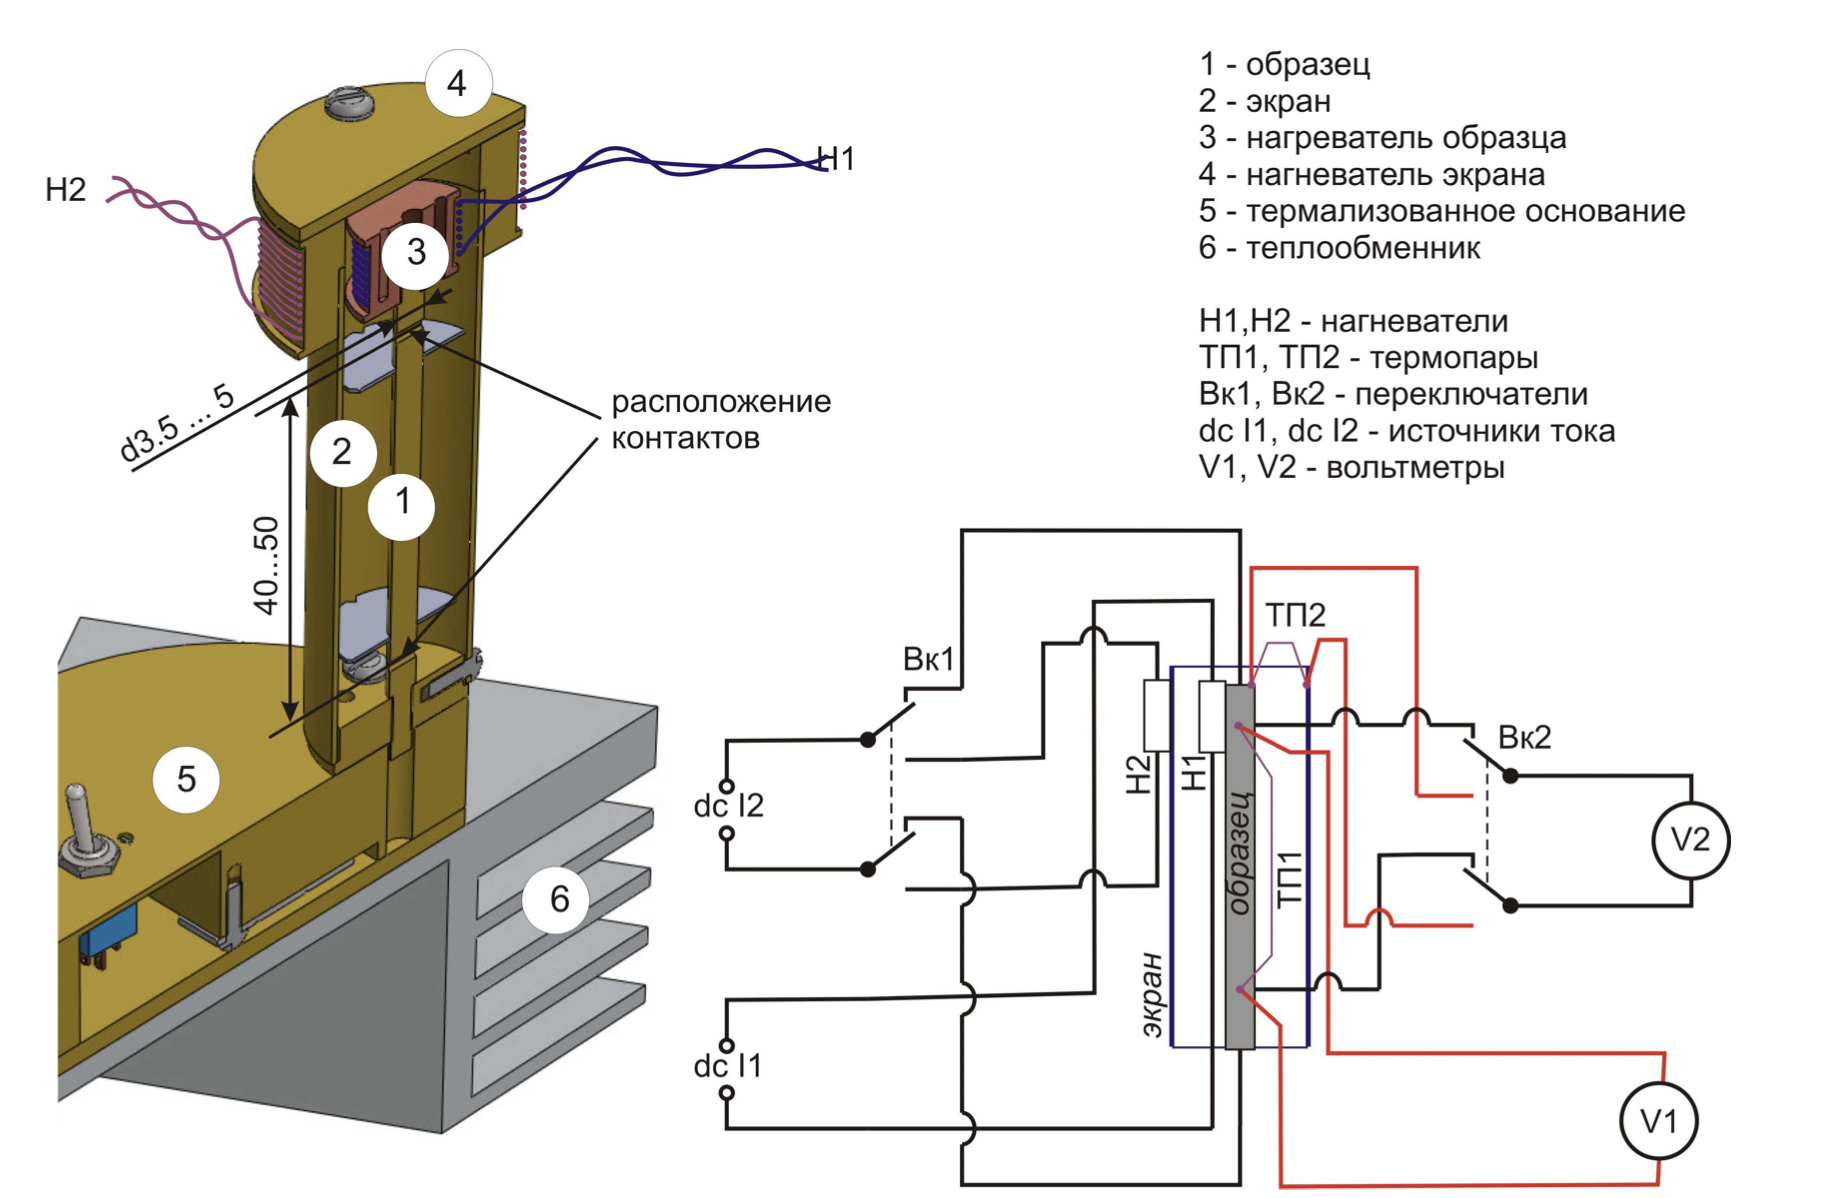

Рис 2. Схема установки



---



# Ход работы

In [247]:
import pandas as pd                                # для работы с dataframes
import numpy as np                                 # np массивы
import matplotlib.pyplot as plt                    # построитель графиков
import scipy.stats as sps
import seaborn as sns
from sklearn.linear_model import LinearRegression  # МНК регрессор
from sklearn import metrics
from scipy.optimize import curve_fit

sns.set(style='darkgrid')                          # стили для графиков
%matplotlib inline

In [248]:
def avg(x):
  return sum(x) * 1.0 / len(x)


def dispersion(x):
  return avg([i * i for i in x]) - avg(x) ** 2

def MNK_errors(x, y):
  k = (avg([i * j for i, j in zip(x, y)]) - avg(x) * avg(y)) / dispersion(x)
  sigma_2 = len(x) / (len(x) - 2) * (dispersion(y) - k ** 2 * dispersion(x))
  sigma_k = (sigma_2 / (len(x) * dispersion(x))) ** 0.5
  sigma_b = (sigma_k * avg([i ** 2 for i in x])) ** 0.5
  return sigma_k, sigma_b

## Параметры образца

В работе используется ячейка номер 5, согласно приложению к работе в исследуемый материал - медь.


Параметры образца

\begin{array}{|c|c|}
\hline
d, мм & 5 \\
\hline
l, мм & 50\\ 
\hline
\end{array}
$$Табл.1$$

# 1. Вольт-амперная характеристика образца

## Измерения для ВАХ образца
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
I, А& 0.000 & 0.100 & 0.200 & 0.300 & 0.400 & 0.500 & 0.600 & 0.700 & 0.800 & 0.900 & 1.000\\
\hline
U, мВ & 0.000 & 0.009 & 0.014 & 0.019 & 0.025 & 0.030 & 0.035 & 0.040 & 0.045 & 0.050 & 0.055\\ 
\hline
\end{array}
$$Табл.2$$

**Перенесем данные в код:**

In [249]:
I = np.array([0.100, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.900, 1.000])             # ток через образец
V = np.array([0.009, 0.014, 0.019, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050, 0.055]) * 10 ** -3  # переводим в вольты

**Обучим модель МНК:**

In [250]:
lr = LinearRegression()
lr.fit(np.array(I).reshape(-1, 1), np.array(V))
R_sig_k, sig_b = MNK_errors(list(I), list(V))
print("погрешность коэффициента МНК", R_sig_k)

погрешность коэффициента МНК 3.401506715247194e-07


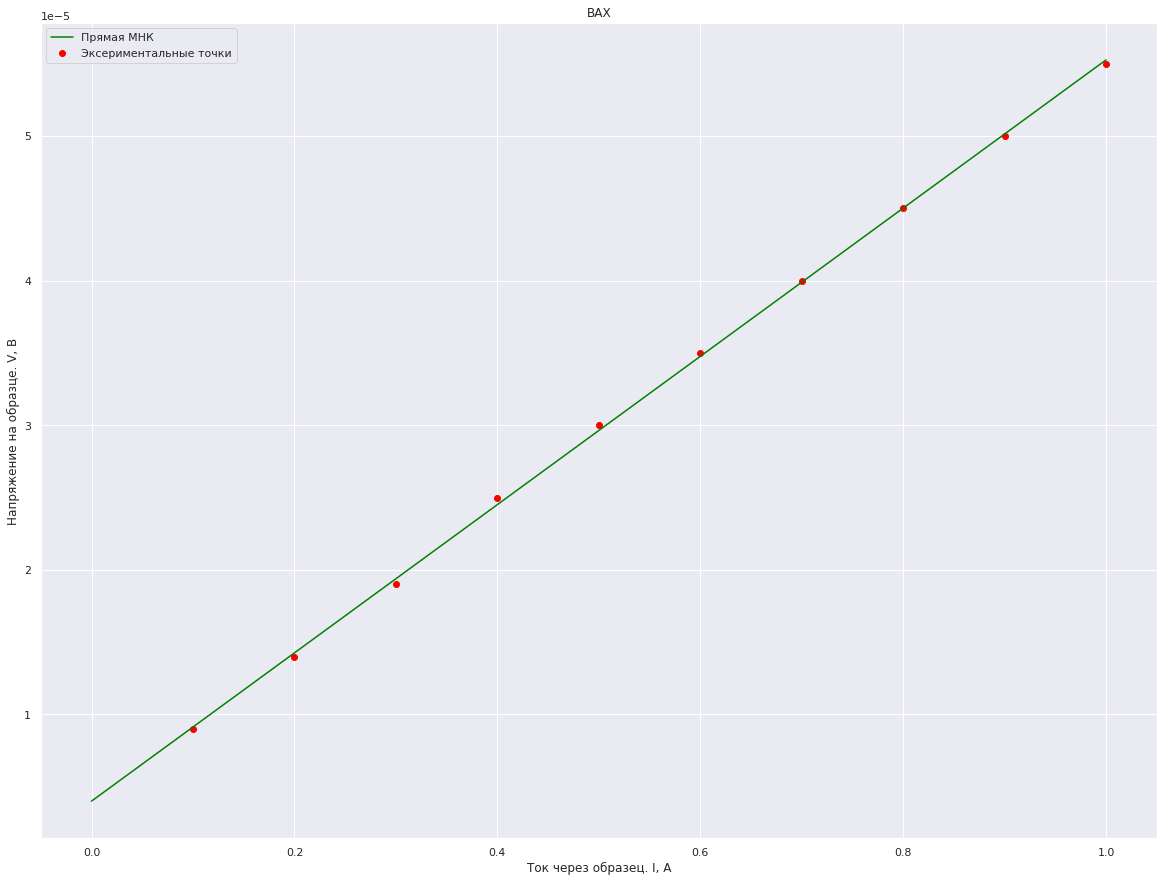

In [251]:
plt.figure(figsize=(20, 15))
plt.plot(np.linspace(0, 1.0, 1000), lr.predict(np.linspace(0, 1.0, 1000).reshape(-1, 1)), color="green", label="Прямая МНК")
plt.scatter(I,  V, color="red", label="Эксериментальные точки") # ненесение точек на график

plt.title("ВАХ")
plt.xlabel("Ток через образец. I, А")
plt.ylabel("Напряжение на образце. V, В")

plt.legend()
plt.show()



---



# 2. Исследование теплопроводности

## Измерения

\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
I_o, А& 0.100 & 0.150 & 0.200 & 0.250 & 0.300 & 0.350 & 0.400 & 0.450 & 0.500\\
\hline
V_o, мВ & 1.255 & 1.899 & 2.526 & 3.154 &  3.794 & 4.412 & 5.048 & 5.674 & 6.304\\ 
\hline
V_t, мВ & 0.052 & 0.090 & 0.159 & 0.226 & 0.321 & 0.433 & 0.615 & 0.758 & 0.936 \\ 
\hline
V_{to}, мВ & 0.001 & 0.000 & 0.000 & 0.001 & -0.001 & 0.000 & 0.000 & 0.001 & 0.001\\ 
\hline
\end{array}
$$Табл.3$$


* $I_o$ - ток через образец
* $V_o$ - напряжение на образце
* $V_t$ - Напряжение на термопаре образца
* $V_{to}$ - Напряжение на термопаре между экраном и образцом

Перенесем данные в код, и вычислим 

In [252]:
I_o = np.array([0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500])
V_o = np.array([1.255, 1.899, 2.526, 3.154, 3.794, 4.412, 5.048, 5.674, 6.304])
V_t = np.array([0.052,  0.090, 0.159, 0.226, 0.321, 0.433, 0.615, 0.758, 0.936])

P = I_o * V_o
dT = V_t / 0.043 # вычисление dТ

print(P)
print(V_t)

[0.1255  0.28485 0.5052  0.7885  1.1382  1.5442  2.0192  2.5533  3.152  ]
[0.052 0.09  0.159 0.226 0.321 0.433 0.615 0.758 0.936]


In [253]:
lr2 = LinearRegression()
lr2.fit(P.reshape(-1, 1), dT)
A_sig_k, sig_b = MNK_errors(list(P), list(dT))
print(A_sig_k)

0.11534274453894652


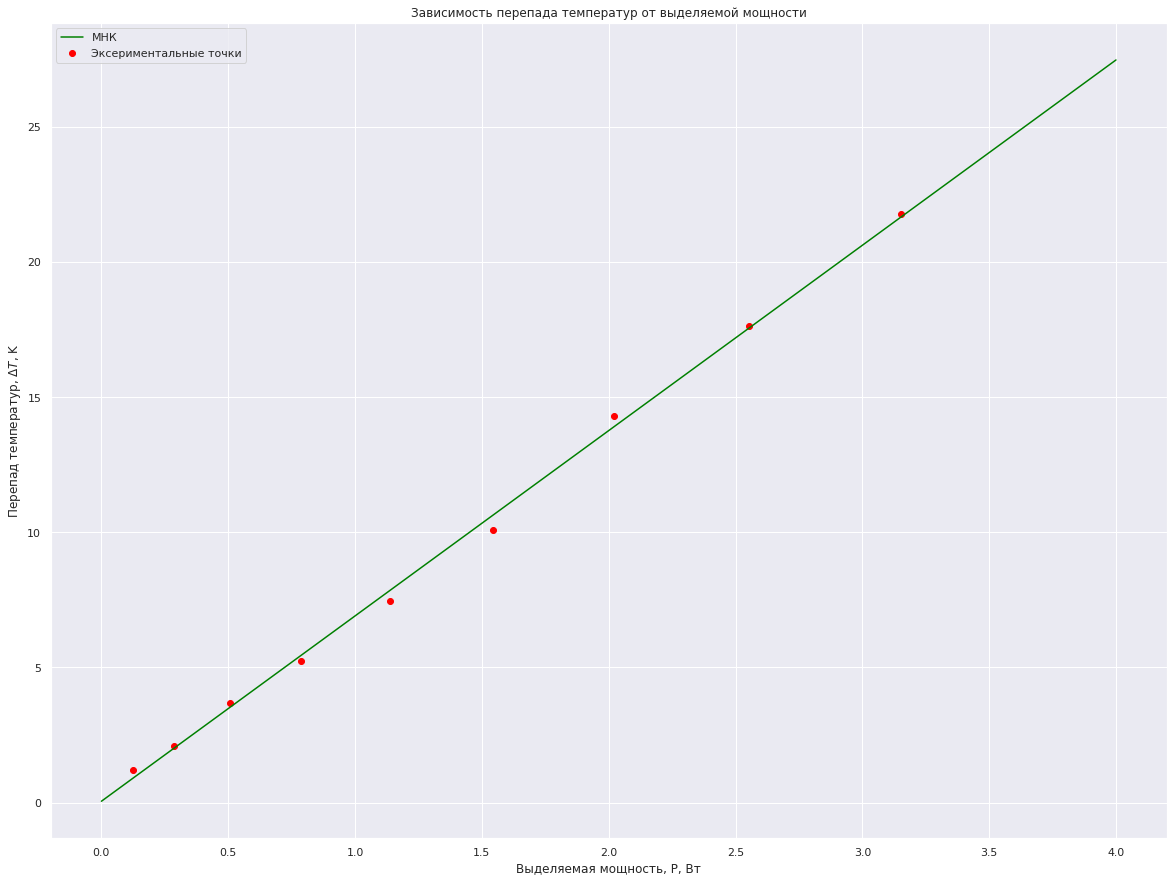

In [254]:
plt.figure(figsize=(20, 15))
plt.plot(np.linspace(0, 4.0, 1000), lr2.predict(np.linspace(0, 4.0, 1000).reshape(-1, 1)), color="green", label="МНК")
plt.scatter(P,  dT, color="red", label="Эксериментальные точки")

plt.title("Зависимость перепада температур от выделяемой мощности")
plt.xlabel("Выделяемая мощность, P, Вт")
plt.ylabel("Перепад температур, $\Delta T$, K")
plt.legend()
plt.show()

In [255]:
print(lr.coef_[0])
print(lr2.coef_[0])
R = lr.coef_[0] 
A = lr2.coef_[0]

5.127272727272728e-05
6.858388184063




---



# 3. Проверка закона Видемана-Франца, оценка и анализ погрешностей

Средняя температура эксперимента $297 \pm 1$ К.

In [256]:
L = R / A / 297
print(L)

2.5171431060708287e-08


In [257]:
delta = R_sig_k / R + A_sig_k / A + 1 / 297
dL = delta * L
print(dL)
print(delta)
print(dL)

6.750703518628706e-10
0.026818910304890514
6.750703518628706e-10


**Получили:** $2.52 * 10^{-8} \pm 0.07 * 10^{-8} $ $Вт*Ом*К^{-2}$

**Истинное значение из теории:** $2.44*10^{-8}$ $Вт*Ом*K^{-2}$



---



# Вывод

Была изучена теория связанная с законом Видемана-Франца, также данный закон был проверен на практике, и значение постоянной Лоренца оказалось близко к теории, и мы почти получили значение близкое к теоретическому в рамках погрешности.



---



# Литература и материалы

* Лекции 1-5 курса "Основы современной физики", Глазков В. Н. (Для понимания и разбора теории)

* Теория к лабараторной работе "Закон Видемана-Франца", Глазков В. Н. (Для непосредственного выполнения экспериментальной части)

* Книга "Основы физики", В. Е. Белонучкин, Д. А. Заикин, Ю. М. Ципенюк (Для понимания и разбора теории)

* Консультации по курсу "Основы современной физики", Глазков В. Н. (Краткая выжимка из теории)

* сайт "Википедия" (исторические сведенья)








---

